# Tugas 7 : Clustering Web dengan Fuzzy C-Means


**Fuzzy C-Means (FCM)** adalah algoritma clustering yang membagi data ke dalam beberapa kelompok (kluster) berdasarkan derajat keanggotaan yang bersifat **fuzzy** (bernilai kontinu antara 0 dan 1), bukan hanya biner seperti pada clustering konvensional.

### Konsep Dasar:
1. **Kluster Fuzzy**:
   - Dalam FCM, setiap data dapat menjadi anggota dari lebih dari satu kluster, dengan tingkat keanggotaan yang berbeda-beda untuk setiap kluster.
   - Tingkat keanggotaan ini diwakili oleh matriks **derajat keanggotaan** (*membership matrix*), dengan nilai antara 0 dan 1.

2. **Fungsi Tujuan**:
   - FCM meminimalkan fungsi tujuan berbasis jarak antara data dan pusat kluster (*cluster centroid*), tetapi dengan bobot yang ditentukan oleh derajat keanggotaan data terhadap kluster tersebut.


3. **Iterasi**:
   - FCM melakukan iterasi untuk memperbarui pusat kluster dan derajat keanggotaan hingga hasilnya konvergen.

---



Perintah `!pip install scikit-fuzzy` digunakan untuk menginstal pustaka **scikit-fuzzy** dalam lingkungan Python.

In [ ]:
!pip install scikit-fuzzy




1. **`pandas`**: Digunakan untuk manipulasi dan analisis data, seperti memproses tabel dan data berbentuk DataFrame.
   
2. **`TfidfVectorizer`** (dari `sklearn.feature_extraction.text`): Mengonversi teks menjadi representasi numerik menggunakan metode **TF-IDF (Term Frequency-Inverse Document Frequency)**. Ini digunakan untuk mengukur pentingnya kata-kata dalam dokumen.

3. **`TruncatedSVD`** (dari `sklearn.decomposition`): Digunakan untuk **reduksi dimensi** menggunakan teknik **Singular Value Decomposition** (SVD), yang mengurangi jumlah fitur dalam data tanpa kehilangan informasi penting.

4. **`cosine_similarity`** (dari `sklearn.metrics.pairwise`): Menghitung **kemiripan kosinus** antara vektor-vektor fitur, sering digunakan untuk mengukur kemiripan antara dokumen dalam ruang vektor.

5. **`re`**: Pustaka untuk operasi pada **regular expressions** yang berguna untuk pencocokan pola dalam string (misalnya menghapus karakter tertentu).

6. **`numpy`**: Pustaka untuk operasi matematika dan array multidimensi, sering digunakan dalam pemrograman numerik.

7. **`IPython.display`**: Digunakan untuk menampilkan output secara lebih fleksibel dalam Jupyter Notebook, seperti menampilkan teks dengan format Markdown.

8. **`skfuzzy`**: Pustaka untuk menerapkan **fuzzy logic**, yang memungkinkan penanganan ketidakpastian dalam pengolahan data dan pengambilan keputusan berbasis data.

9. **`accuracy_score`** (dari `sklearn.metrics`): Digunakan untuk menghitung akurasi model klasifikasi, yaitu persentase prediksi yang benar.

10. **`LabelEncoder`** (dari `sklearn.preprocessing`): Mengubah label kategorikal menjadi format numerik agar dapat diproses oleh algoritma pembelajaran mesin.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import re
import numpy as np
from IPython.display import display, Markdown
import skfuzzy as fuzz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv")
df.head()

,judul,tanggal,isi_berita,kategori,berita_clean,case_folding,tokenize,stopword_removal
0,Jorge Martin Bisa Saingi Bagnaia-Marc Marquez ...,"Kamis, 28 Nov 2024 17:50 WIB","Jorge Martin mengatakan, Francesco Bagnaia dan...",Olahraga,Jorge Martin mengatakan Francesco Bagnaia dan ...,jorge martin mengatakan francesco bagnaia dan ...,"['jorge', 'martin', 'mengatakan', 'francesco',...",jorge martin francesco bagnaia marc marquez fa...
1,Tiwi Tak Ingin Sia-Siakan Kesempatan Main di W...,"Kamis, 28 Nov 2024 12:30 WIB",Pebulutangkis ganda putri Amallia Cahaya Prati...,Olahraga,Pebulutangkis ganda putri Amallia Cahaya Prati...,pebulutangkis ganda putri amallia cahaya prati...,"['pebulutangkis', 'ganda', 'putri', 'amallia',...",pebulutangkis ganda putri amallia cahaya prati...
2,"Daftar Atlet BWF World Tour Finals 2024, 6 Wak...","Rabu, 27 Nov 2024 18:50 WIB",Kejuaraan bulutangkis BWF World Tour Finals 20...,Olahraga,Kejuaraan bulutangkis BWF World Tour Finals a...,kejuaraan bulutangkis bwf world tour finals a...,"['kejuaraan', 'bulutangkis', 'bwf', 'world', '...",kejuaraan bulutangkis bwf world tour finals ha...
3,"Performanya Terus Menanjak, Putri KW Bungkam K...","Rabu, 27 Nov 2024 17:20 WIB",Putri Kusuma Wardani sempat dapat banyak kriti...,Olahraga,Putri Kusuma Wardani sempat dapat banyak kriti...,putri kusuma wardani sempat dapat banyak kriti...,"['putri', 'kusuma', 'wardani', 'sempat', 'dapa...",putri kusuma wardani kritik sukses membungkamn...
4,Marc Marquez Sukses Usir Hantu,"Rabu, 27 Nov 2024 16:15 WIB","Semusim di tim Gresini, Marc Marquez berhasil ...",Olahraga,Semusim di tim Gresini Marc Marquez berhasil m...,semusim di tim gresini marc marquez berhasil m...,"['semusim', 'di', 'tim', 'gresini', 'marc', 'm...",semusim tim gresini marc marquez berhasil meng...




1. **Mengonversi Data Teks ke TF-IDF**:
   - **`TfidfVectorizer(norm='l2')`**: Inisialisasi objek `TfidfVectorizer` yang digunakan untuk mengonversi teks menjadi representasi numerik. Normalisasi `l2` memastikan bahwa panjang vektor fitur untuk setiap dokumen disesuaikan, sehingga menghindari dominasi kata-kata dengan frekuensi tinggi.
   - **`fit_transform(df['stopword_removal'])`**: Menghitung nilai **TF-IDF** untuk setiap kata dalam dokumen yang ada di kolom `'stopword_removal'` pada DataFrame `df`.
   - **`pd.DataFrame(tfidf_matrix.toarray())`**: Mengonversi hasil TF-IDF, yang berupa matriks sparse, menjadi DataFrame agar lebih mudah diakses dan dianalisis. Kolomnya adalah kata-kata yang terdapat dalam dokumen.

2. **Reduksi Dimensi dengan Truncated SVD**:
   - **`TruncatedSVD(n_components=100)`**: Inisialisasi objek `TruncatedSVD` untuk mereduksi dimensi dari hasil TF-IDF menjadi hanya 100 komponen utama, yang membantu mengurangi kompleksitas data.
   - **`fit_transform(tfidf_matrix)`**: Menerapkan **SVD** pada matriks TF-IDF untuk menghasilkan matriks dengan dimensi yang lebih rendah, mempertahankan informasi utama namun mengurangi noise dan dimensi yang tidak perlu.
   - **`pd.DataFrame(svd_matrix)`**: Mengonversi hasil reduksi dimensi (matriks SVD) ke dalam DataFrame, sehingga hasilnya mudah dianalisis dan digunakan dalam langkah-langkah berikutnya.

3. **Menampilkan Hasil**:
   - **`svd_df.head(100)`**: Menampilkan 100 baris pertama dari hasil matriks yang telah direduksi menggunakan SVD. Ini berguna untuk mengevaluasi dan memahami bagaimana representasi data telah berubah setelah reduksi dimensi.

kode ini mengubah teks menjadi representasi numerik yang lebih kompak dan terstruktur menggunakan TF-IDF dan SVD, seperti perhitungan kemiripan antar dokumen.

In [ ]:
# 2. Mengonversi Data Teks ke TF-IDF
# Menginisialisasi TfidfVectorizer dengan normalisasi L2
vectorizer = TfidfVectorizer(norm='l2')

# Menghitung nilai TF-IDF untuk setiap dokumen
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

# Mengubah hasil TF-IDF menjadi DataFrame untuk kemudahan akses
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# 3. Reduksi Dimensi dengan Truncated SVD
# Menginisialisasi TruncatedSVD untuk mereduksi dimensi menjadi 100 komponen (atau sesuai kebutuhan)
svd = TruncatedSVD(n_components=100, random_state=42)

# Mengaplikasikan SVD pada matriks TF-IDF untuk menghasilkan matriks dengan dimensi yang lebih rendah
svd_matrix = svd.fit_transform(tfidf_matrix)

# Menyimpan hasil SVD dalam DataFrame untuk digunakan dalam perhitungan kemiripan
svd_df = pd.DataFrame(svd_matrix)

# Menampilkan 10 baris pertama dari DataFrame hasil SVD
svd_df.head(100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.168975,0.357579,0.580137,0.043078,-0.012253,-0.039456,-0.017882,-0.020133,-0.004108,-0.023767,...,0.070849,0.027410,0.050965,0.305473,-0.017290,-0.274979,-0.139468,-0.035363,0.007413,0.001498
1,0.301929,-0.021818,-0.031645,-0.090512,0.005865,-0.169977,0.256924,-0.028627,0.049571,0.021039,...,-0.019229,0.012596,0.017963,-0.020823,-0.001000,0.000004,-0.009278,-0.007349,0.009535,0.003464
2,0.445845,-0.123774,-0.054900,-0.039878,0.002215,-0.214882,0.456924,-0.062764,-0.054834,0.015528,...,-0.017072,-0.276167,-0.077146,0.080969,0.027562,0.035464,0.040719,0.015098,-0.005068,0.002985
3,0.311286,0.037179,-0.025953,-0.235157,-0.001283,-0.099974,-0.100940,0.045917,0.086748,0.034067,...,-0.022548,-0.020647,-0.032350,0.013598,-0.001280,-0.000619,0.008411,-0.033007,0.000487,-0.010440
4,0.127281,0.354316,0.584139,0.055067,-0.028820,-0.072981,0.000829,-0.007880,-0.165895,0.127813,...,0.030487,0.004611,-0.127802,-0.140564,-0.024514,-0.279226,0.335581,0.035586,-0.016411,-0.009227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.044941,0.258673,-0.108587,0.094981,0.745341,-0.039682,-0.022217,-0.110295,-0.053351,-0.113840,...,-0.018935,-0.001686,-0.021918,-0.016746,0.006093,0.011223,0.028477,0.009666,0.356474,0.014008
96,0.023334,0.133592,-0.091968,0.031690,-0.038251,-0.022279,0.013061,-0.075796,0.087255,0.259317,...,-0.006206,-0.004449,-0.003527,-0.011012,0.001761,0.012578,0.002251,-0.001684,0.000858,-0.001136
97,0.037742,0.204502,-0.118444,0.062958,0.012388,0.062856,0.124489,0.719785,-0.033524,-0.015010,...,-0.384372,0.016863,0.011397,0.010733,-0.010864,-0.031466,-0.011564,0.006785,0.004321,-0.005585
98,0.017568,0.056720,-0.036051,0.007316,-0.017289,-0.011396,0.040903,-0.040035,0.096826,0.279352,...,0.003654,0.004690,-0.007944,-0.002806,0.006399,-0.006778,0.006288,0.002331,-0.000065,0.000404


Perintah `tfidf_df.head(100)` digunakan untuk menampilkan **100 baris pertama** dari DataFrame `tfidf_df`, yang berisi hasil perhitungan **TF-IDF** dari dokumen yang ada.

- **`tfidf_df`**: Ini adalah DataFrame yang berisi representasi numerik dari dokumen-dokumen setelah proses TF-IDF, di mana setiap kolom mewakili satu kata unik yang ada dalam seluruh dokumen.
- **`head(100)`**: Menampilkan 100 baris pertama dari DataFrame tersebut, yang berfungsi untuk melihat sebagian kecil data dan memeriksa hasil perhitungan TF-IDF.

Tujuannya adalah untuk memeriksa fitur-fitur (kata-kata) yang memiliki nilai TF-IDF tinggi pada dokumen tertentu, serta untuk mendapatkan gambaran tentang bagaimana representasi numerik dari teks tersebut.

In [ ]:
tfidf_df.head(100)


,aaron,abhiram,abraham,absen,acara,aci,acungi,adakah,adangan,adelia,...,yuni,yunus,yunyu,yusuf,zac,zaman,zat,zero,zita,zoom
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.050513,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.035881,0.0,0.0,0.0
98,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0



1. **Menghapus Label Kategori**:  
   - Kolom `kategori` yang berisi label asli dikosongkan untuk memastikan hanya fitur yang digunakan dalam proses **clustering** (pengelompokan data).
   
2. **Fuzzy C-Means Clustering**:  
   - **Fuzzy C-Means** adalah algoritma clustering di mana setiap data dapat memiliki derajat keanggotaan pada lebih dari satu kluster.  
   - Pada kode ini, jumlah kluster (`n_clusters`) ditentukan sebanyak 2.  
   - Proses ini menghasilkan beberapa nilai seperti pusat kluster (`cntr`), derajat keanggotaan (`u`), dan informasi lain yang digunakan untuk mengelompokkan data.

3. **Menentukan Kluster Akhir**:  
   - Setelah proses clustering, data dimasukkan ke dalam kluster berdasarkan derajat keanggotaan tertinggi untuk setiap data.

4. **Mengukur Akurasi Clustering**:  
   - Jika kolom `kategori` ada dalam data, maka label kategori asli diubah menjadi numerik (misalnya "Olahraga" = 0, "Makanan" = 1).
   - **Akurasi** dihitung dengan membandingkan hasil kluster yang dihasilkan dengan label asli untuk menilai seberapa baik clustering mencocokkan kategori yang ada.

5. **Output**:  
   - Jika kolom `kategori` ada, akurasi hasil clustering akan dicetak; jika tidak, pesan bahwa akurasi tidak dapat dihitung akan ditampilkan.

In [ ]:
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import accuracy_score

# 4. Menghapus Label Kategori dari Data untuk Clustering
# Misalkan kolom 'kategori' berisi label kategori asli, kita drop kolom tersebut untuk proses clustering
data_features = svd_df.drop(columns=['kategori'], errors='ignore')  # Buat pastikan kolom kategori memang ada

# 5. Proses Fuzzy C-Means Clustering
# Menentukan jumlah kluster (misalnya 2 kluster)
n_clusters = 2

# Menjalankan Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_features.T, n_clusters, m=2, error=0.05, maxiter=100, init=None, seed=42
)

# Menentukan kluster akhir untuk setiap data berdasarkan derajat keanggotaan tertinggi
cluster_labels = np.argmax(u, axis=0)

# 6. Mengukur Akurasi Clustering
# Misalkan kolom 'kategori' menyimpan label asli
if 'kategori' in df.columns:
    # Mengonversi label kategori ke bentuk numerik jika belum
    df['kategori_numerik'] = pd.factorize(df['kategori'])[0]

    # Menghitung akurasi dengan membandingkan hasil clustering dengan label asli
    akurasi = accuracy_score(df['kategori_numerik'], cluster_labels)
    print(f"Akurasi Clustering Fuzzy C-Means: {akurasi:.2f}")
else:
    print("Kolom 'kategori' tidak ditemukan pada dataset; akurasi tidak dapat dihitung.")


Akurasi Clustering Fuzzy C-Means: 0.77




1. **Menambahkan Kolom Kluster ke DataFrame**:  
   - Hasil dari **Fuzzy C-Means Clustering** yang berisi kluster untuk setiap dokumen disimpan dalam kolom baru bernama `cluster` di DataFrame `df`. Ini memudahkan untuk melihat dokumen beserta kategori asli dan kluster mereka.

2. **Visualisasi Hasil Clustering**:
   - **PCA (Principal Component Analysis)** digunakan untuk mereduksi dimensi data dari banyak fitur menjadi 2 dimensi agar bisa divisualisasikan.
   - Setelah data direduksi, DataFrame `pca_df` dibuat untuk memudahkan plotting data 2D. Di sini, kolom `PC1` dan `PC2` adalah komponen utama yang diperoleh dari PCA, dan kolom `cluster` berisi kluster yang dihasilkan.

3. **Plot Hasil Clustering**:
   - Dengan menggunakan **matplotlib**, data yang telah diproses dipetakan ke dalam grafik 2D.  
   - Setiap kluster digambarkan dengan warna berbeda (misalnya merah untuk kluster 1, biru untuk kluster 2).
   - Grafik ini memberi gambaran visual mengenai bagaimana data dikelompokkan oleh algoritma **Fuzzy C-Means**.

4. **Output Visual**:
   - Grafik 2D menampilkan kluster-kluster yang dihasilkan dari proses clustering, memudahkan untuk melihat pola atau keterkaitan antar dokumen berdasarkan pengelompokkan yang telah dilakukan.

,stopword_removal,kategori,cluster
0,jorge martin francesco bagnaia marc marquez fa...,Olahraga,1
1,pebulutangkis ganda putri amallia cahaya prati...,Olahraga,0
2,kejuaraan bulutangkis bwf world tour finals ha...,Olahraga,0
3,putri kusuma wardani kritik sukses membungkamn...,Olahraga,0
4,semusim tim gresini marc marquez berhasil meng...,Olahraga,1
...,...,...,...
95,tahukah cuaca buruk mempengaruhi seduhan kopi ...,Makanan,0
96,jakarta berdiri puluhan restoranrestoran klasi...,Makanan,1
97,produk makanan dipasarkan menu diet dicap efek...,Makanan,1
98,jakarta istri mahalini jago masak momennya mas...,Makanan,1


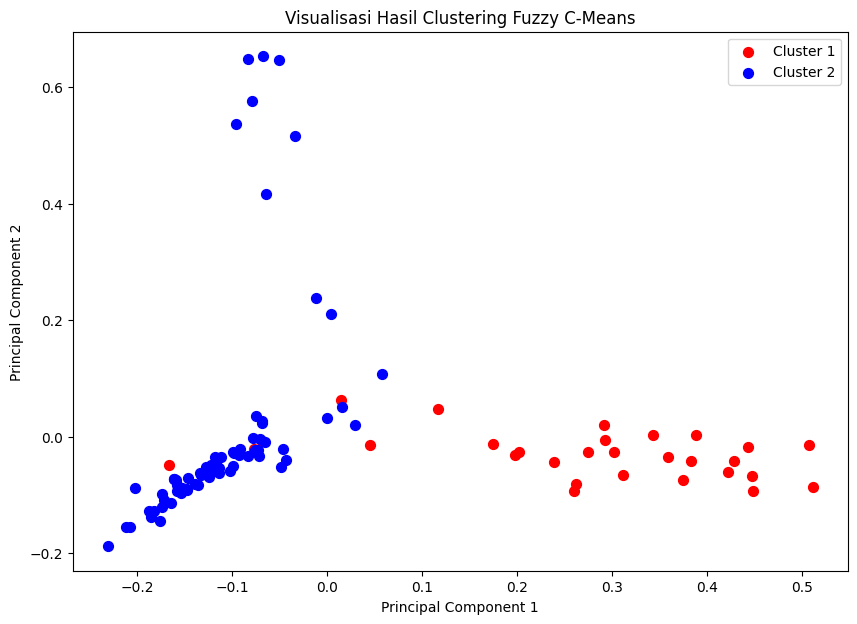

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 7. Menambahkan Kolom Kluster ke DataFrame
# Menyimpan hasil kluster di dalam DataFrame asli untuk memudahkan tampilan
df['cluster'] = cluster_labels

# Menampilkan beberapa dokumen beserta kluster mereka
display(df[['stopword_removal', 'kategori', 'cluster']].head(100))

# 8. Visualisasi Kluster
# Menggunakan PCA untuk mereduksi data ke dalam 2 dimensi agar bisa divisualisasikan
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_features)

# Mengonversi hasil PCA ke DataFrame untuk kemudahan visualisasi
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels

# Plot hasil klustering
plt.figure(figsize=(10, 7))
colors = ['red', 'blue']  # Sesuaikan warna untuk setiap kluster

for cluster in range(n_clusters):
    subset = pca_df[pca_df['cluster'] == cluster]
    plt.scatter(subset['PC1'], subset['PC2'], s=50, color=colors[cluster], label=f'Cluster {cluster + 1}')

# Menambahkan keterangan dan judul grafik
plt.title("Visualisasi Hasil Clustering Fuzzy C-Means")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()




### 1. **Membaca Dataset**
   - Kode ini membaca dataset dari file CSV yang disimpan di Google Drive, dan mengisi nilai kosong (`NaN`) pada kolom `stopword_removal` dengan string kosong (`''`).

### 2. **TF-IDF Vectorizer**
   - **TfidfVectorizer** digunakan untuk mengubah teks pada kolom `stopword_removal` menjadi representasi numerik berupa **matriks TF-IDF**. TF-IDF adalah cara untuk menghitung bobot kata-kata dalam dokumen, dengan mempertimbangkan seberapa sering kata muncul dan seberapa penting kata tersebut dalam seluruh dokumen.

### 3. **Inisialisasi Akurasi untuk Plot**
   - Rentang jumlah komponen untuk **SVD (Singular Value Decomposition)** ditentukan, mulai dari 2 hingga 100 komponen.
   - Sebuah list `akurasi_list` disiapkan untuk menyimpan nilai akurasi dari setiap iterasi pengurangan dimensi.

### 4. **Perulangan untuk Mengurangi Komponen**
   - Dalam perulangan, kode ini:
     - Melakukan **SVD** untuk mereduksi dimensi matriks TF-IDF menjadi `n_components` yang berbeda-beda, dari 2 hingga 100.
     - Hasil **SVD** disimpan dalam `svd_matrix` dan dikonversi menjadi DataFrame `data_features` untuk kemudahan analisis lebih lanjut.

### 5. **Fuzzy C-Means Clustering**
   - **Fuzzy C-Means Clustering** digunakan untuk mengelompokkan data ke dalam 2 kluster. Algoritma ini menghasilkan **derajat keanggotaan** setiap dokumen terhadap masing-masing kluster.
   - **`u`** adalah matriks keanggotaan, dan kluster yang dipilih untuk setiap dokumen adalah kluster dengan derajat keanggotaan tertinggi (`np.argmax(u, axis=0)`).

### 6. **Mengukur Akurasi**
   - Jika kolom `kategori` ada dalam DataFrame, label kategori dikonversi menjadi numerik menggunakan `pd.factorize`, lalu dihitung akurasi menggunakan **accuracy_score** antara hasil kluster dan label kategori asli.
   - Jika tidak ada kolom `kategori`, akurasi tidak dihitung.

### 7. **Plot Akurasi Berdasarkan Jumlah Komponen SVD**
   - Setelah melakukan perulangan untuk berbagai nilai `n_components`, akurasi yang dihitung pada setiap langkah disimpan dalam list `akurasi_list`.
   - Kemudian, grafik akurasi vs jumlah komponen SVD digambarkan dengan menggunakan **matplotlib** untuk melihat bagaimana perubahan jumlah komponen mempengaruhi hasil clustering.

### Tujuan dari kode:
   - Menilai performa **Fuzzy C-Means clustering** pada data teks dengan **reduksi dimensi** menggunakan **SVD**.
   - Menghitung dan memvisualisasikan akurasi clustering dengan jumlah komponen yang berbeda dalam proses reduksi dimensi, untuk menentukan jumlah komponen SVD yang optimal bagi performa clustering.

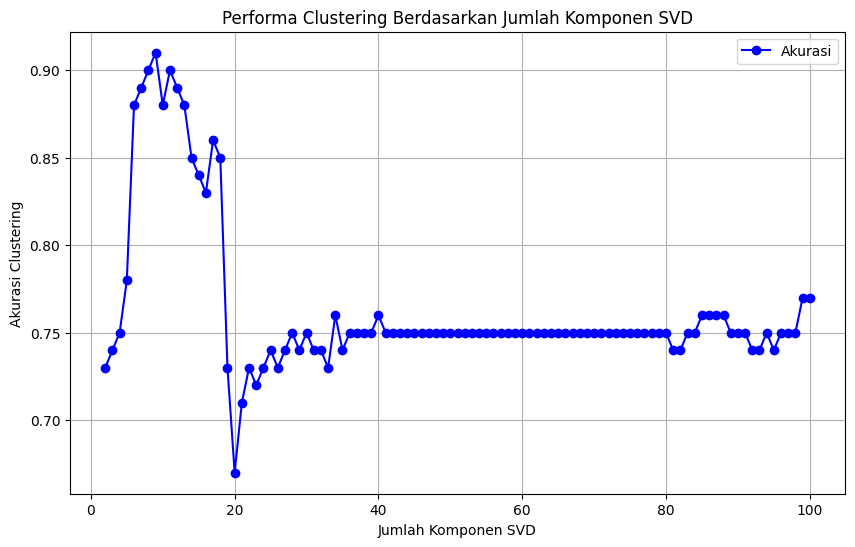

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import numpy as np

# 1. Membaca Dataset
df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv")
df['stopword_removal'] = df['stopword_removal'].fillna('')

# 2. TF-IDF Vectorizer
vectorizer = TfidfVectorizer(norm='l2')
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

# 3. Inisialisasi Akurasi untuk Plot
component_range = range(2, 101)  # Ubah sesuai rentang yang diinginkan
akurasi_list = []

# 4. Perulangan untuk Mengurangi Komponen
for n_components in component_range:
    svd = TruncatedSVD(n_components=n_components, random_state=42)
    svd_matrix = svd.fit_transform(tfidf_matrix)

    data_features = pd.DataFrame(svd_matrix)

    # 5. Fuzzy C-Means Clustering
    n_clusters = 2
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data_features.T, n_clusters, m=2, error=0.05, maxiter=100, init=None, seed=42
    )
    cluster_labels = np.argmax(u, axis=0)

    # 6. Mengukur Akurasi (Jika Kategori Ada)
    if 'kategori' in df.columns:
        df['kategori_numerik'] = pd.factorize(df['kategori'])[0]
        akurasi = accuracy_score(df['kategori_numerik'], cluster_labels)
    else:
        akurasi = None  # Tidak ada pengukuran jika tidak ada label kategori

    akurasi_list.append(akurasi)

# 7. Plot Akurasi Berdasarkan Komponen
plt.figure(figsize=(10, 6))
plt.plot(component_range, akurasi_list, marker='o', color='b', label='Akurasi')
plt.title("Performa Clustering Berdasarkan Jumlah Komponen SVD")
plt.xlabel("Jumlah Komponen SVD")
plt.ylabel("Akurasi Clustering")
plt.grid(True)
plt.legend()
plt.show()




### 1. **Fungsi `clean_data(matrix)`**
   - Fungsi ini digunakan untuk membersihkan data, mengubah nilai `NaN` dan nilai tak terhingga (positif/negatif infinity) menjadi 0.0 dalam matriks.

### 2. **Fungsi `evaluate_clustering(data_features, true_labels, n_clusters=2)`**
   - Fungsi ini melakukan clustering menggunakan **Fuzzy C-Means** pada data fitur dan membandingkan hasil klustering dengan label asli menggunakan **accuracy_score**.
   - Hasilnya adalah akurasi dan label kluster yang dihasilkan.

### 3. **Fungsi `reduce_features_and_evaluate(tfidf_matrix, true_labels, ...)`**
   - Fungsi utama yang mengurangi dimensi data secara bertahap (melalui reduksi fitur) dan kemudian mengevaluasi akurasi clustering menggunakan **Fuzzy C-Means**.
   - **Tahap 1**: Melakukan pengurangan fitur yang cepat dari jumlah fitur asli hingga 500.
   - **Tahap 2**: Melakukan pengurangan fitur secara lebih halus dari 500 hingga 2 fitur.
   - Menghitung akurasi clustering pada setiap tahap dan menyimpan hasilnya.

### 4. **Persiapan Data**
   - Dataset dibaca dari file CSV, kemudian teks pada kolom `stopword_removal` diubah menjadi matriks TF-IDF menggunakan **TfidfVectorizer**.

### 5. **Reduksi Dimensi dan Evaluasi**
   - **Reduksi Dimensi** dilakukan dengan menggunakan **TruncatedSVD** untuk mereduksi jumlah fitur.
   - **Fuzzy C-Means Clustering** dievaluasi pada setiap jumlah fitur yang dikurangi, dan akurasi dihitung.

### 6. **Visualisasi Hasil**
   - **3 plot** dihasilkan untuk memvisualisasikan hubungan antara jumlah fitur dan akurasi:
     1. **Line Plot** antara jumlah fitur dan akurasi.
     2. **Scatter Plot** dengan warna berdasarkan akurasi.
     3. **Scatter Plot** dengan ukuran titik yang proporsional terhadap akurasi.
   - **Scatter plot kluster** juga ditampilkan berdasarkan hasil clustering terbaik, dengan komponen utama yang diperoleh melalui **PCA**.

### 7. **Menampilkan Hasil Terbaik**
   - Indeks dengan akurasi tertinggi dicari, dan informasi terkait jumlah fitur terbaik serta akurasi terbaik ditampilkan.
   - **Tabel Hasil** yang menunjukkan jumlah fitur dan akurasi pada setiap langkah juga ditampilkan.

### Tujuan:
   - Kode ini bertujuan untuk mengevaluasi performa **Fuzzy C-Means Clustering** dengan jumlah fitur yang berbeda, dan untuk menentukan jumlah fitur optimal yang memberikan akurasi clustering terbaik. Selain itu, dilakukan visualisasi kluster dan analisis akurasi dalam bentuk grafik yang informatif.

Fitur: 4458, Akurasi: 0.2300
Fitur: 4258, Akurasi: 0.2300
Fitur: 4058, Akurasi: 0.2300
Fitur: 3858, Akurasi: 0.2300
Fitur: 3658, Akurasi: 0.2300
Fitur: 3458, Akurasi: 0.2300
Fitur: 3258, Akurasi: 0.2300
Fitur: 3058, Akurasi: 0.2300
Fitur: 2858, Akurasi: 0.2300
Fitur: 2658, Akurasi: 0.2300
Fitur: 2458, Akurasi: 0.2300
Fitur: 2258, Akurasi: 0.2300
Fitur: 2058, Akurasi: 0.2300
Fitur: 1858, Akurasi: 0.2300
Fitur: 1658, Akurasi: 0.2300
Fitur: 1458, Akurasi: 0.2300
Fitur: 1258, Akurasi: 0.2300
Fitur: 1058, Akurasi: 0.2300
Fitur: 858, Akurasi: 0.2300
Fitur: 658, Akurasi: 0.2300
Fitur: 458, Akurasi: 0.2300
Fitur: 457, Akurasi: 0.2300
Fitur: 456, Akurasi: 0.2300
Fitur: 455, Akurasi: 0.2300
Fitur: 454, Akurasi: 0.2300
Fitur: 453, Akurasi: 0.2300
Fitur: 452, Akurasi: 0.2300
Fitur: 451, Akurasi: 0.2300
Fitur: 450, Akurasi: 0.2300
Fitur: 449, Akurasi: 0.2300
Fitur: 448, Akurasi: 0.2300
Fitur: 447, Akurasi: 0.2300
Fitur: 446, Akurasi: 0.2300
Fitur: 445, Akurasi: 0.2300
Fitur: 444, Akurasi: 0.2300
Fi

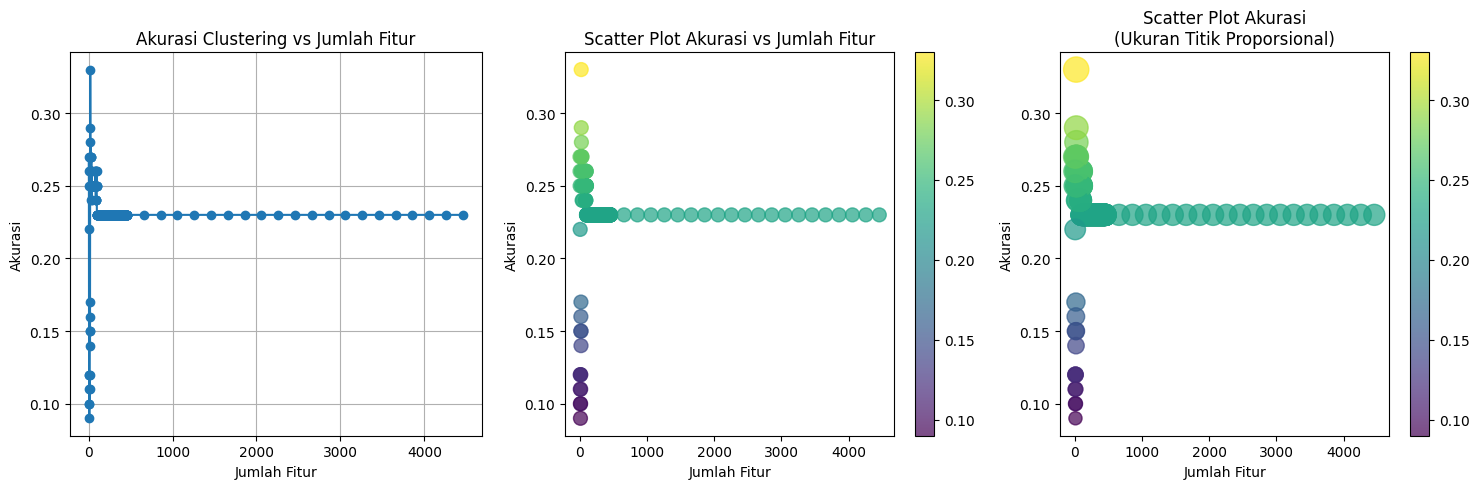


Jumlah fitur terbaik: 20
Akurasi terbaik: 0.3300


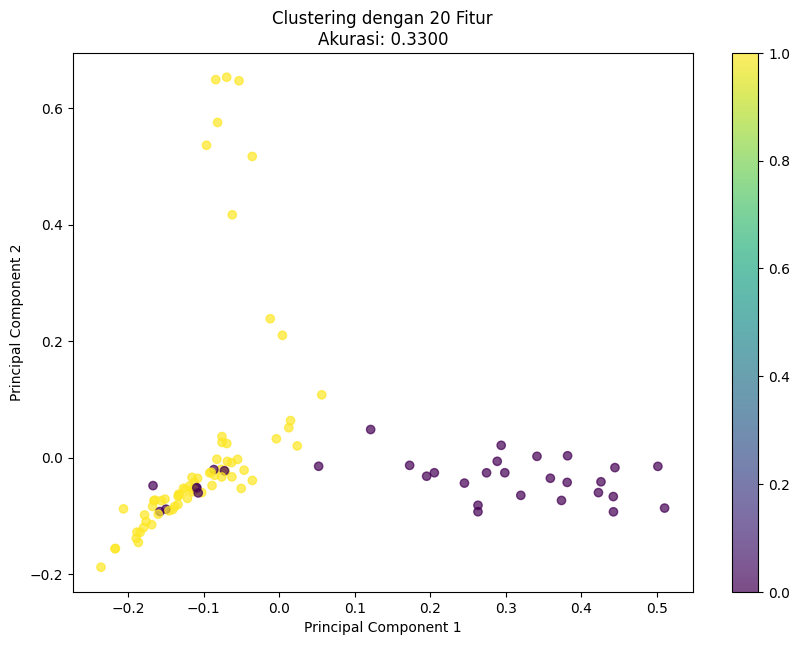


Tabel Hasil Reduksi Fitur:
     Jumlah Fitur  Akurasi
0            4458     0.23
1            4258     0.23
2            4058     0.23
3            3858     0.23
4            3658     0.23
..            ...      ...
472             6     0.12
473             5     0.22
474             4     0.25
475             3     0.26
476             2     0.27

[477 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Fungsi untuk membersihkan data
def clean_data(matrix):
    matrix = np.nan_to_num(matrix, nan=0.0, posinf=0.0, neginf=0.0)
    return matrix

# Fungsi untuk melakukan clustering dan evaluasi
def evaluate_clustering(data_features, true_labels, n_clusters=2):
    try:
        # Membersihkan data sebelum clustering
        data_features = clean_data(data_features)

        # Menjalankan Fuzzy C-Means
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
            data_features.T, n_clusters, m=2, error=0.05, maxiter=1000, init=None, seed=42
        )

        # Menentukan kluster akhir
        cluster_labels = np.argmax(u, axis=0)

        # Mengonversi label true ke numerik jika belum
        label_encoder = LabelEncoder()
        true_labels_encoded = label_encoder.fit_transform(true_labels)

        # Menghitung akurasi
        akurasi = accuracy_score(true_labels_encoded, cluster_labels)

        return akurasi, cluster_labels
    except Exception as e:
        print(f"Error dalam clustering: {e}")
        return None, None

def reduce_features_and_evaluate(tfidf_matrix, true_labels,
                                 max_features=None,
                                 min_components=2,
                                 component_reduction=200):  # Tambahkan parameter component_reduction
    # Jika max_features tidak ditentukan, gunakan jumlah fitur asli
    if max_features is None:
        max_features = tfidf_matrix.shape[1]

    # Daftar untuk menyimpan hasil
    feature_counts = []
    accuracies = []
    all_cluster_labels = []

    # Konversi sparse matrix ke dense dan bersihkan
    tfidf_matrix_dense = clean_data(tfidf_matrix.toarray())

    # Tahap 1: Reduksi cepat ke 500 fitur
    current_features = max_features
    while current_features > 500:
        try:
            # Reduksi dimensi dengan SVD
            svd = TruncatedSVD(
                n_components=min(current_features, tfidf_matrix_dense.shape[1]-1),
                random_state=42
            )
            svd_matrix = clean_data(svd.fit_transform(tfidf_matrix_dense))

            # Evaluasi clustering
            akurasi, cluster_labels = evaluate_clustering(svd_matrix, true_labels)

            # Jika clustering berhasil
            if akurasi is not None:
                feature_counts.append(current_features)
                accuracies.append(akurasi)
                all_cluster_labels.append(cluster_labels)

                print(f"Fitur: {current_features}, Akurasi: {akurasi:.4f}")

            # Kurangi jumlah fitur secara signifikan
            current_features -= component_reduction

        except Exception as e:
            print(f"Terjadi kesalahan dengan {current_features} fitur: {e}")
            current_features -= component_reduction
            continue

    # Tahap 2: Reduksi perlahan dari 500 ke 2
    while current_features >= min_components:
        try:
            # Reduksi dimensi dengan SVD
            svd = TruncatedSVD(
                n_components=min(current_features, tfidf_matrix_dense.shape[1]-1),
                random_state=42
            )
            svd_matrix = clean_data(svd.fit_transform(tfidf_matrix_dense))

            # Evaluasi clustering
            akurasi, cluster_labels = evaluate_clustering(svd_matrix, true_labels)

            # Jika clustering berhasil
            if akurasi is not None:
                feature_counts.append(current_features)
                accuracies.append(akurasi)
                all_cluster_labels.append(cluster_labels)

                print(f"Fitur: {current_features}, Akurasi: {akurasi:.4f}")

            # Kurangi jumlah fitur satu per satu
            current_features -= 1

        except Exception as e:
            print(f"Terjadi kesalahan dengan {current_features} fitur: {e}")
            current_features -= 1
            continue

    return feature_counts, accuracies, all_cluster_labels


# Membaca Dataset
df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW-A/hasil_preprocesing.csv")

# Inisialisasi TF-IDF Vectorizer
vectorizer = TfidfVectorizer(norm='l2')
tfidf_matrix = vectorizer.fit_transform(df['stopword_removal'])

# Lakukan reduksi fitur dan evaluasi
feature_counts, accuracies, all_cluster_labels = reduce_features_and_evaluate(
    tfidf_matrix,
    df['kategori'],
    min_components=2,
    component_reduction=200  # Anda bisa sesuaikan jumlah pengurangan
)

# Siapkan plot dengan 3 subplot
plt.figure(figsize=(15, 5))

# 1. Plot Akurasi vs Jumlah Fitur (Line Plot)
plt.subplot(1, 3, 1)
plt.plot(feature_counts, accuracies, marker='o')
plt.title('Akurasi Clustering vs Jumlah Fitur')
plt.xlabel('Jumlah Fitur')
plt.ylabel('Akurasi')
plt.grid(True)

# 2. Scatter Plot Akurasi vs Jumlah Fitur
plt.subplot(1, 3, 2)
scatter = plt.scatter(feature_counts, accuracies,
                      c=accuracies,
                      cmap='viridis',
                      s=100,
                      alpha=0.7)
plt.colorbar(scatter)
plt.title('Scatter Plot Akurasi vs Jumlah Fitur')
plt.xlabel('Jumlah Fitur')
plt.ylabel('Akurasi')

# 3. Scatter Plot dengan Ukuran Proporional pada Akurasi
plt.subplot(1, 3, 3)
sizes = [(acc * 1000) for acc in accuracies]  # Skala ukuran titik
scatter = plt.scatter(feature_counts, accuracies,
                      c=accuracies,
                      s=sizes,
                      cmap='viridis',
                      alpha=0.7)
plt.colorbar(scatter)
plt.title('Scatter Plot Akurasi\n(Ukuran Titik Proporsional)')
plt.xlabel('Jumlah Fitur')
plt.ylabel('Akurasi')

plt.tight_layout()
plt.show()

# Temukan indeks akurasi tertinggi
best_index = accuracies.index(max(accuracies))
best_features = feature_counts[best_index]
best_cluster_labels = all_cluster_labels[best_index]

print(f"\nJumlah fitur terbaik: {best_features}")
print(f"Akurasi terbaik: {accuracies[best_index]:.4f}")

# Visualisasi kluster terbaik dengan PCA
from sklearn.decomposition import PCA

# Konversi sparse matrix ke dense dan bersihkan
tfidf_matrix_dense = clean_data(tfidf_matrix.toarray())

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
svd = TruncatedSVD(n_components=best_features, random_state=42)
svd_matrix = clean_data(svd.fit_transform(tfidf_matrix_dense))
pca_result = pca.fit_transform(svd_matrix)

# Plot scatter dengan warna kluster
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1],
                      c=best_cluster_labels,
                      cmap='viridis',
                      alpha=0.7)
plt.colorbar(scatter)
plt.title(f'Clustering dengan {best_features} Fitur\nAkurasi: {accuracies[best_index]:.4f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Tambahan: Tabel hasil untuk referensi
hasil_df = pd.DataFrame({
    'Jumlah Fitur': feature_counts,
    'Akurasi': accuracies
})
print("\nTabel Hasil Reduksi Fitur:")
print(hasil_df)